In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from keras.optimizers import RMSprop

In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Layer
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import mean_squared_error
from tensorflow.keras import backend as K
from keras.initializers import Initializer
from sklearn.cluster import KMeans

class RBFLayer(Layer):
    def __init__(self, units, gamma, use_kmeans=False, kmeans_initializer=None, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units
        self.gamma = gamma
        self.use_kmeans = use_kmeans
        self.kmeans_initializer = kmeans_initializer

    def build(self, input_shape):
        if self.use_kmeans:
            self.centers = self.add_weight(name='centers',
                                          shape=(self.units, input_shape[-1]),
                                          initializer=self.kmeans_initializer,
                                          trainable=True)
        else:
            self.centers = self.add_weight(name='centers',
                                          shape=(self.units, input_shape[-1]),
                                          initializer='uniform',
                                          trainable=True)
        super(RBFLayer, self).build(input_shape)

    # ... (rest of the methods remain unchanged)

class InitCentersKMeans(Initializer):
    """ Initializer for initialization of centers of RBF network
        by clustering the given data set.
    # Arguments
        X: matrix, dataset
    """

    def __init__(self, X, max_iter=100):
        self.X = X
        self.max_iter = max_iter

    def __call__(self, shape, dtype=None):
        assert shape[1] == self.X.shape[1]

        n_centers = shape[0]
        km = KMeans(n_clusters=n_centers, max_iter=self.max_iter, verbose=0)
        km.fit(self.X)
        return km.cluster_centers_

In [4]:
# load Pivot data
url = 'https://raw.githubusercontent.com/ravsssh/HandballPrediction/main/Handball%20Prediction/data/RW.csv'
df = pd.read_csv(url, delimiter=';')
# Menentukan input and output
X = df.drop(columns=["GOAL","7MSHOT","9MSHOT","6MSHOT","WINGSHOT","PIVOTSHOT","FASTBREAKSHOT"])
y = df.GOAL
# Membagi data set 80 : 20 train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Merancang Neural Network Model
model = Sequential()
model.add(Flatten(input_shape=(6,)))
model.add(RBFLayer(6, 0.5, use_kmeans=True, kmeans_initializer=InitCentersKMeans(X_train)))
model.add(Dense(1, activation='linear'))
# ... (rest of your code)
learning_rate = 0.001
optimizer = RMSprop(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='mean_squared_error')
# Melatih arsitektur model terhadap dataset
model.fit(X_train, y_train, batch_size=16, epochs=500)
# Melakukan prediksi nilai
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

F:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Epoch 1/500
58/58 [==============================] - 0s 1ms/step - loss: 10.4945
Epoch 2/500
58/58 [==============================] - 0s 1ms/step - loss: 9.8348
Epoch 3/500
58/58 [==============================] - 0s 1ms/step - loss: 9.1933
Epoch 4/500
58/58 [==============================] - 0s 1ms/step - loss: 8.5905
Epoch 5/500
58/58 [==============================] - 0s 1ms/step - loss: 8.0191
Epoch 6/500
58/58 [==============================] - 0s 1ms/step - loss: 7.4773
Epoch 7/500
58/58 [==============================] - 0s 1ms/step - loss: 6.9707
Epoch 8/500
58/58 [==============================] - 0s 1ms/step - loss: 6.4794
Epoch 9/500
58/58 [==============================] - 0s 1ms/step - loss: 6.0193
Epoch 10/500
58/58 [==============================] - 0s 1ms/step - loss: 5.6019
Epoch 11/500
58/58 [==============================] - 0s 1ms/step - loss: 5.1986
Epoch 12/500
58/58 [==============================] - 0s 1ms/step - loss: 4.8290
Epoch 13/500
58/58 [================

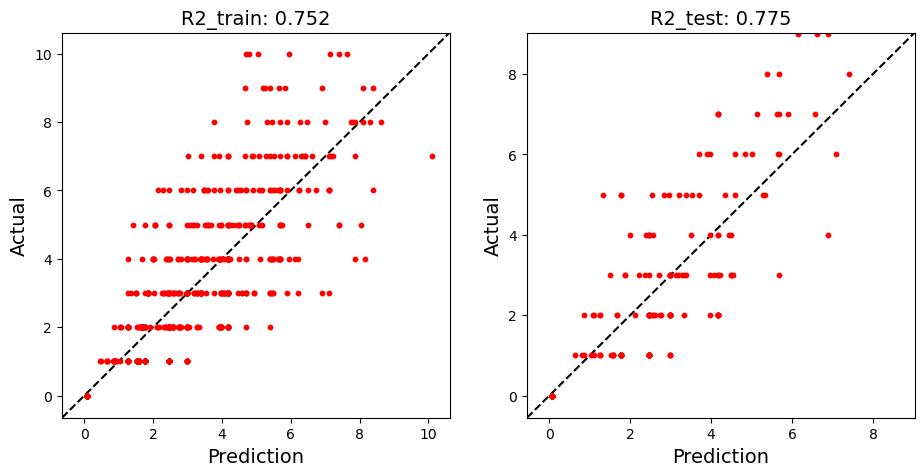

In [5]:
    # evaluation
    plt.figure(figsize=(11, 5))

    plt.subplot(121)
    plt.scatter(pred_train, y_train, c='r', s=10)
    x1, x2 = plt.xlim()
    y1, y2 = plt.ylim()
    lim = min(x1, y1), min(x2, y2)
    plt.xlim(*lim)
    plt.ylim(*lim)
    plt.plot(lim, lim, 'k--', zorder=-1)
    plt.xlabel("Prediction", fontsize=14)
    plt.ylabel("Actual", fontsize=14)
    plt.title(f"R2_train: {r2_score(y_train, pred_train):.3f}", fontsize=14)
    

    plt.subplot(122)
    plt.scatter(pred_test, y_test, c='r', s=10)
    x1, x2 = plt.xlim()
    y1, y2 = plt.ylim()
    lim = min(x1, y1), min(x2, y2)
    plt.xlim(*lim)
    plt.ylim(*lim)
    plt.plot(lim, lim, 'k--', zorder=-1)
    plt.xlabel("Prediction", fontsize=14)
    plt.ylabel("Actual", fontsize=14)
    plt.title(f"R2_test: {r2_score(y_test, pred_test):.3f}", fontsize=14)
    
    plt.show()
   


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 6)                 0         
                                                                 
 rbf_layer (RBFLayer)        (None, 6)                 36        
                                                                 
 dense (Dense)               (None, 1)                 7         
                                                                 
Total params: 43 (172.00 Byte)
Trainable params: 43 (172.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [100]:
urlacc = 'https://raw.githubusercontent.com/ravsssh/HandballPrediction/main/Handball%20Prediction/data/Sensitivity/ACC.csv'
acc_df = pd.read_csv(urlacc, delimiter = ';')
acc_sensitivity = model.predict(acc_df)
print(acc_sensitivity)

3/3 [==============================] - 0s 1ms/step
[[-0.05560684]
 [ 0.13892055]
 [ 0.41144204]
 [ 0.76434946]
 [ 1.184015  ]
 [ 1.6373966 ]
 [ 2.0738401 ]
 [ 2.433244  ]
 [ 2.6592638 ]
 [ 2.7137046 ]
 [ 2.5870712 ]
 [-0.05560684]
 [ 0.07791305]
 [ 0.25972378]
 [ 0.48808575]
 [ 0.75060797]
 [ 1.0232092 ]
 [ 1.2725983 ]
 [ 1.462478  ]
 [ 1.5620741 ]
 [ 1.5542777 ]
 [ 1.4404508 ]
 [-0.05560684]
 [ 0.15181136]
 [ 0.35482788]
 [ 0.52609205]
 [ 0.6391125 ]
 [ 0.67492557]
 [ 0.6272969 ]
 [ 0.5044949 ]
 [ 0.32694435]
 [ 0.12167501]
 [-0.08436441]
 [-0.05560684]
 [ 0.31665206]
 [ 0.72723484]
 [ 1.1253357 ]
 [ 1.4736211 ]
 [ 1.752331  ]
 [ 1.9579847 ]
 [ 2.0986278 ]
 [ 2.188085  ]
 [ 2.2411368 ]
 [ 2.270524  ]
 [-0.05560684]
 [ 0.2624576 ]
 [ 0.6391492 ]
 [ 1.044188  ]
 [ 1.4317815 ]
 [ 1.7481627 ]
 [ 1.9435098 ]
 [ 1.9847336 ]
 [ 1.8646414 ]
 [ 1.6039872 ]
 [ 1.2456075 ]
 [-0.05560684]
 [ 0.14912319]
 [ 0.3983009 ]
 [ 0.657547  ]
 [ 0.89780736]
 [ 1.100062  ]
 [ 1.2563965 ]
 [ 1.3680892 ]
 [ 1

In [103]:
pd.DataFrame(acc_sensitivity).to_csv('sensitivitasaccuracy.csv', index=False)